<a href="https://www.kaggle.com/code/vishantmathur/employee-salary?scriptVersionId=127484545" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Collection

In [2]:
df1 = pd.read_csv("/kaggle/input/employees-department-dataset/Department_Dataset.csv",index_col="ID")
df2 = pd.read_csv("/kaggle/input/employee-salary-dataset/Employee_Salary_Dataset.csv",index_col="ID")

In [3]:
df = pd.merge(df1,df2,on="ID")

In [4]:
df.head()

,Dept_name,location,travel_required,Experience_Years,Age,Gender,Salary
ID,,,,,,,
1,HR,Pune,yes,5,28,Female,250000
2,Finance,Bangalore,no,1,21,Male,50000
3,Finance,Bangalore,no,3,23,Female,170000
4,Finance,Pune,no,2,22,Male,25000
5,Tech,Mumbai,no,1,17,Male,10000


In [5]:
df.shape

(35, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 1 to 35
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Dept_name         35 non-null     object
 1   location          35 non-null     object
 2   travel_required   35 non-null     object
 3   Experience_Years  35 non-null     int64 
 4   Age               35 non-null     int64 
 5   Gender            35 non-null     object
 6   Salary            35 non-null     int64 
dtypes: int64(3), object(4)
memory usage: 2.2+ KB


In [7]:
df.describe()

,Experience_Years,Age,Salary
count,35.00000,35.000000,3.500000e+01
mean,9.20000,35.485714,2.059147e+06
std,7.55295,14.643552,3.170124e+06
min,1.00000,17.000000,3.000000e+03
25%,2.50000,22.500000,2.250000e+04
50%,6.00000,29.000000,2.500000e+05
75%,15.00000,53.500000,3.270000e+06
max,27.00000,62.000000,1.000000e+07


In [8]:
df.isnull().sum()

Dept_name           0
location            0
travel_required     0
Experience_Years    0
Age                 0
Gender              0
Salary              0
dtype: int64

In [9]:
df['Salary'].describe()

count    3.500000e+01
mean     2.059147e+06
std      3.170124e+06
min      3.000000e+03
25%      2.250000e+04
50%      2.500000e+05
75%      3.270000e+06
max      1.000000e+07
Name: Salary, dtype: float64

## EDA

In [10]:
new_df = df.iloc[:,:-1]
df_numerical = new_df.select_dtypes(exclude='object').columns
df_categorical = new_df.select_dtypes(include='object').columns

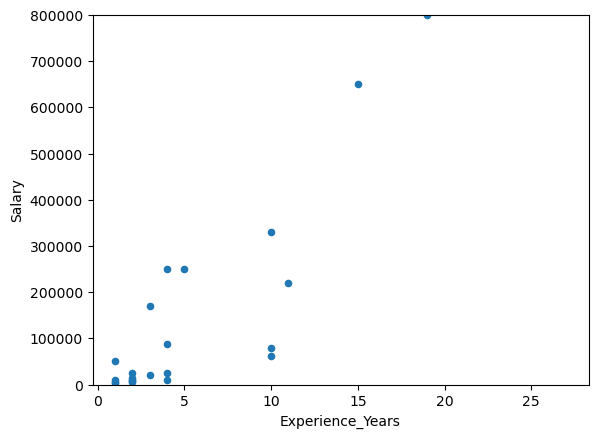

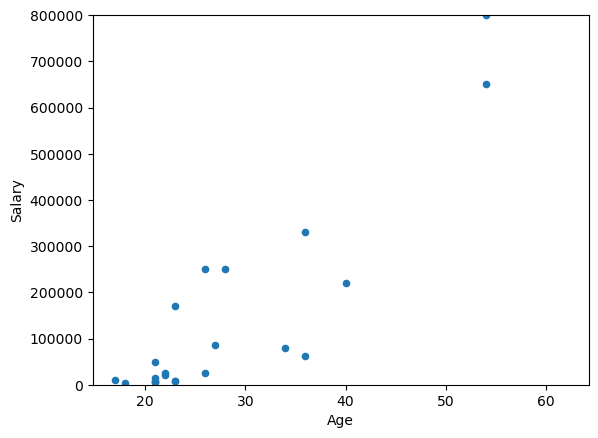

In [11]:
for i in df_numerical:
    dte = pd.concat([df['Salary'], df[i]], axis=1)
    dte.plot.scatter(x=i, y='Salary', ylim=(0,800000));

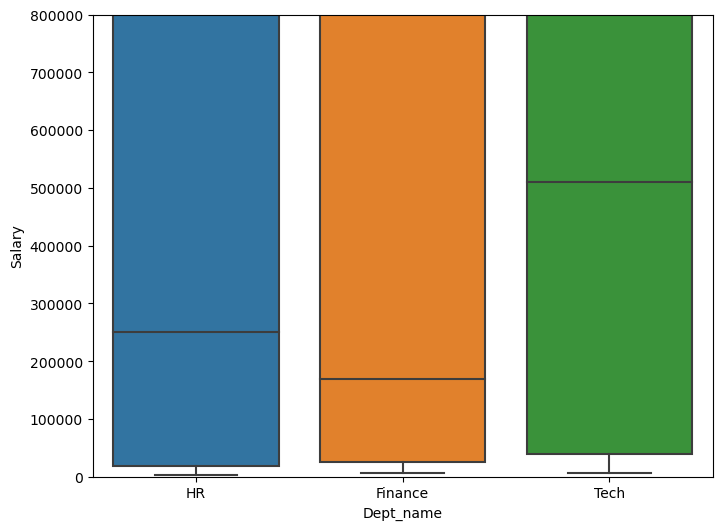

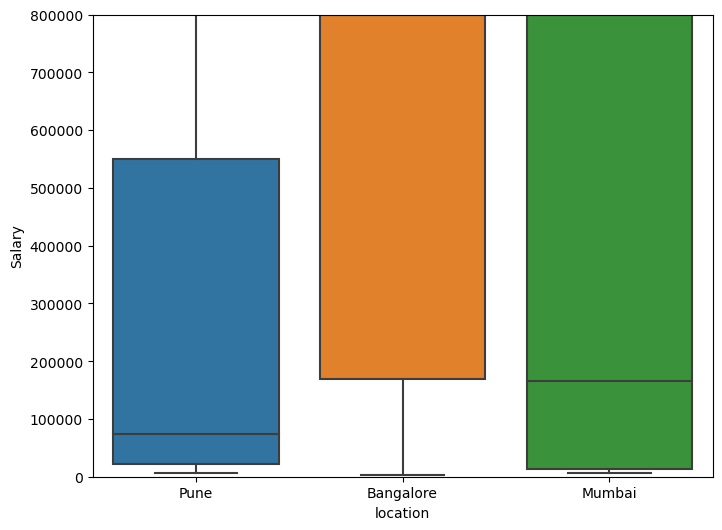

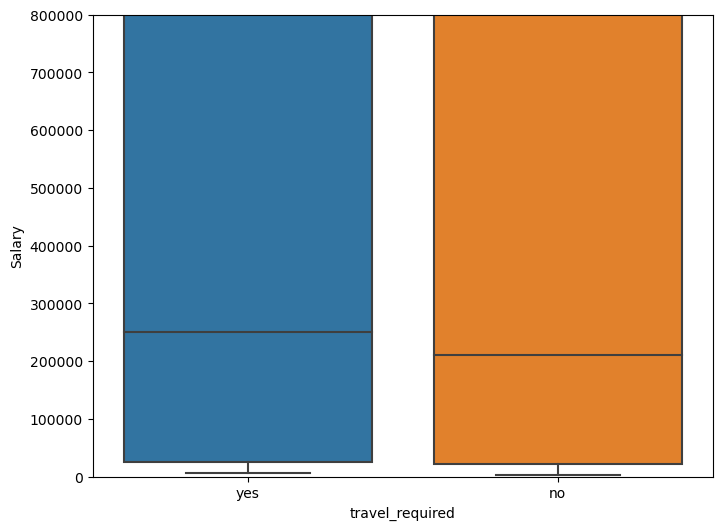

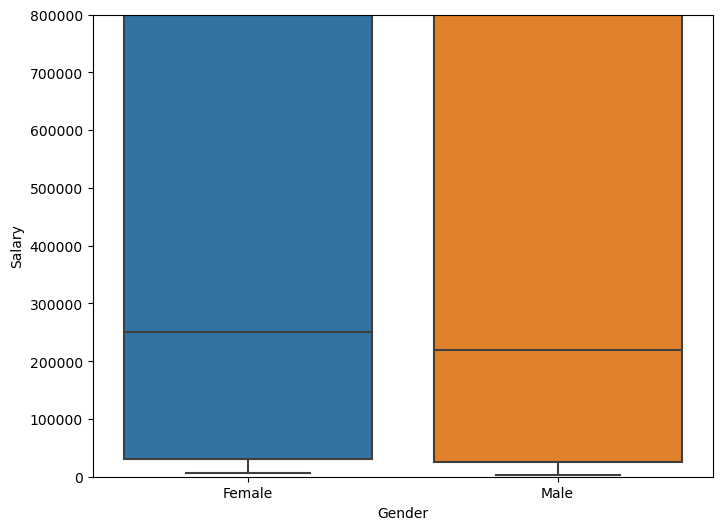

In [12]:
for i in df_categorical:
    data = pd.concat([df['Salary'], df[i]], axis=1)
    f, ax = plt.subplots(figsize=(8, 6))
    fig = sns.boxplot(x=i, y="Salary", data=df)
    fig.axis(ymin=0, ymax=800000);

## Required Conclusions

### Average Salary of all the employees

In [13]:
overall_avg = df['Salary'].mean()
print("Average Salary of all the employee is ",overall_avg)

Average Salary of all the employee is  2059147.142857143


### Department having highest number of employees

In [14]:
highest_employee = df['Dept_name'].value_counts().idxmax()
print(highest_employee," department has highest number of employees")

Tech  department has highest number of employees


### Gender distribution of employees

In [15]:
df['Gender'].value_counts()

Female    18
Male      17
Name: Gender, dtype: int64

In [16]:
male = df['Gender'].value_counts()['Male']
female = df['Gender'].value_counts()['Female']
print("Number of Male Employees are ",male)
print("Number of Female Employees are ",female)
print("Percentage of Male Employee are ",((male*100)/(male+female)))
print("Percentage of Female Employee are ",((female*100)/(male+female)))

Number of Male Employees are  17
Number of Female Employees are  18
Percentage of Male Employee are  48.57142857142857
Percentage of Female Employee are  51.42857142857143


### Correlation between Years of Experience and Salary

In [17]:
print(df['Experience_Years'].corr(df['Salary']))

0.6855999775494617


### Average Salary by department

In [18]:
df['Dept_name'].value_counts()

Tech       14
HR         12
Finance     9
Name: Dept_name, dtype: int64

In [19]:
Tech_avg = 0
HR_avg = 0
Finance_avg = 0
for i in df.index:
    if df['Dept_name'][i] == "Tech":
        Tech_avg += df['Salary'][i]
    elif df['Dept_name'][i] == "HR":
        HR_avg += df['Salary'][i]
    else:
        Finance_avg += df['Salary'][i]
Tech_avg = Tech_avg/df['Dept_name'].value_counts()['Tech']
HR_avg = HR_avg/df['Dept_name'].value_counts()['HR']
Finance_avg = Finance_avg/df['Dept_name'].value_counts()['Finance']
print("Average Salary of Tech employees are ",Tech_avg)
print("Average Salary of HR employees are ",HR_avg)
print("Average Salary of Finance employees are ",Finance_avg)

Average Salary of Tech employees are  2077257.142857143
Average Salary of HR employees are  1958208.3333333333
Average Salary of Finance employees are  2165561.111111111


### Highest Average Salary by department

In [20]:
maxm = max(Tech_avg, HR_avg, Finance_avg)
if maxm == Tech_avg:
    print("\nTech department has highest average salary")
elif maxm == HR_avg:
    print("\nHR department has highest average salary")
else:
    print("\nFinance department has highest average salary")


Finance department has highest average salary
